# Multinomial Logistic Regression(Classification)

#### class가 n개인 경우에 사용하는 분류기 (3개 이상)

---

## Multinomial Logistic Regression(Iris dataset)

### 데이터 준비 (3개 이상)

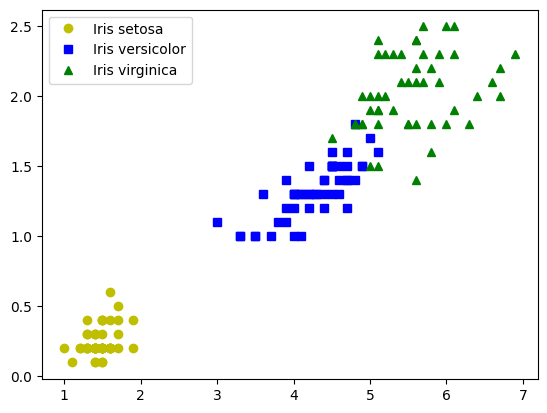

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris["data"][:, (2,3)] # 꽃잎의 길이와 너비만 fancy indexing
y = iris["target"]

plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.legend()
plt.show()

### Multinomial Logistic Regression

#### LogisticRegrsssion의 multi_class에 “multinomial”을 지정.

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

iris = load_iris()
X = iris["data"][:, (2,3)] # 꽃잎의 길이와 너비만 fancy indexing
y = iris["target"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

softmax_reg = LogisticRegression(multi_class="multinomial", C=1, penalty='l2')  # penalty=12 : L2 패널티 기본
softmax_reg.fit(X_train, y_train)

y_predict = softmax_reg.predict(X_test)
score = metrics.r2_score(y_test, y_predict)
print(f"accuracy = {score}")

accuracy = 0.9264705882352942


---

## SGDClassifier 

### SGD(Stochastic Gradient Descent) 알고리즘
#### SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal’, eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

### 주요 cost function
#### - loss="hinge": (소프트 마진)선형 SVM
#### - loss="modified_huber": 부드러운 힌지 손실
#### - loss="log": 로지스틱 회귀

### sklearn.linear_model.SGDClassifier

[1]


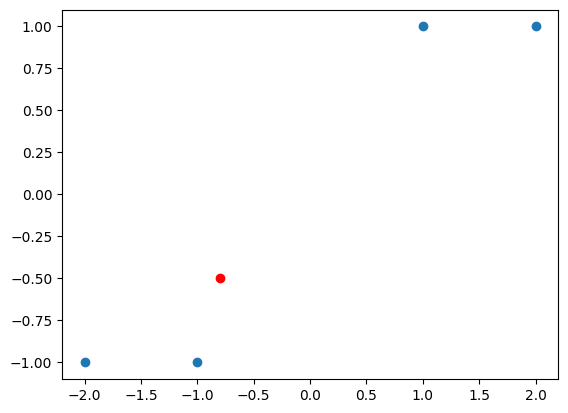

In [4]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

clf = SGDClassifier(max_iter=1000, tol=1e-3)  # 기본값 
clf.fit(X, y)
print(clf.predict([[-0.8, -0.5]]))

plt.scatter(X[:,0], X[:,1])
plt.scatter(-0.8, -0.5, marker="o", color="r")
plt.show()

---

## MNIST & Digits Dataset

### -  MNIST: 우편번호 필기숫자 데이터베이스
### -  Digits: 필기숫자 데이터베이스

### Digits Dataset(sklearn) 

#### 데이터 준비 

(1797, 64) (1797,)


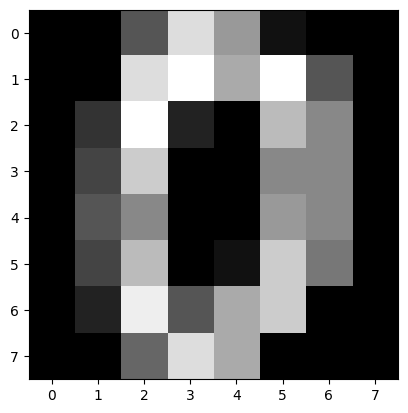

In [5]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target
print(X.shape, y.shape)

first_digit = X[0]
first_digit_image = first_digit.reshape(8, 8)   # x, y 범위값 , 해상도 

plt.imshow(first_digit_image, cmap="gray")
plt.show()

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # train data 70%, test data 30%로 분리 

model = SGDClassifier()       # SGDClassifier 적용 
model.fit(X_train, y_train)   # 학습 데이터로 학습 

y_pred = model.predict(X_test)    # 테스트 데이터로 예측 
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

accuracy: 0.9629629629629629


### MNIST Dataset(sklearn) 

#### 데이터 준비 

In [7]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

(70000, 784) (70000,)


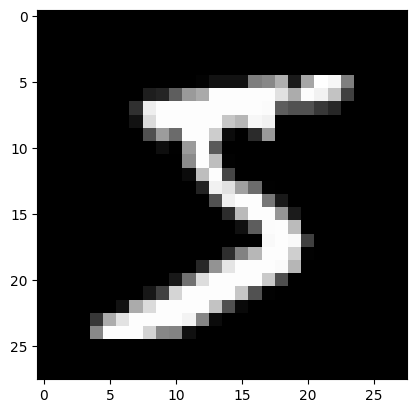

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X, y = mnist.data, mnist.target
print(X.shape, y.shape)

first_digit = np.array(X.iloc[0,:].tolist())
first_digit_image = first_digit.reshape(28, 28)   #해상도, 28x28

plt.imshow(first_digit_image, cmap="gray")
plt.show()

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SGDClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")

accuracy: 0.8728571428571429
